In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import warnings

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Parameters

In [2]:
# The filtering based on hotspots.
# filter_version = 'including'  # 'including', 'excluding', 'only'
list_filter_versions = ['including', 'excluding', 'only']

INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }#[filter_version]

FREQS_PREFIX = {
        'including':'tables/freqs.denovoIndels.', 
        'excluding':'tables/freqs.exclHotspots.', 
        'only':'tables/freqs.onlyHotspots.' 
    }#[filter_version]


# The 3 species.
list_species = ['mouse','macaque','human']
# The alignment chosen.
alignment = 'chrM'

# Import indels for 3 species

In [3]:
def get_indels(filter_version):
    # Combine indels for the three species.
    INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{INDEL_PREFIX[filter_version]}{alignment}_{species}.tab' )
        list_df.append( df )
    df_indels = pd.concat(list_df)
    return df_indels

df_indels = get_indels('including')
df_indels

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Pedigree,Version,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,G129,original,NaN,germline,Germline de novo,12343_AT_A,Unique to Individual,G133p4_12343,non-D-loop,15423
1,chrM,13053,T,TC,SB=2.11058;AF=0.00329761;AC=0,SRR10068701,.:2:0.00115607:2.64192,mouse,2.0,0.001156,...,G129,original,NaN,germline,Germline de novo,13053_T_TC,Between pedigrees,G133p4_13053,non-D-loop,15423
2,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,G129,original,NaN,germline,Germline de novo,14806_CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAA...,Unique to Individual,G133p4_14806,non-D-loop,15423
3,chrM,14640,A,AG,SB=1.61939;AF=0.00191388;AC=0,SRR10068702,.:2:0.00191388:1.61939,mouse,2.0,0.001914,...,G129,original,NaN,somatic,Somatic de novo,14640_A_AG,Unique to Individual,G133p4_14640,non-D-loop,15423
4,chrM,5171,G,GA,SB=2.50905;AF=0.00293255;AC=0,SRR10068703,.:2:0.0034904:3.49031,mouse,2.0,0.003490,...,G129,original,NaN,somatic,Somatic de novo,5171_G_GA,Between pedigrees,G133p4_5171,non-D-loop,15423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,chrM,864,A,AATGTT,SB=2.38069;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38069,human,1.0,0.000582,...,NaN,relin,9034.0,germline,Germline de novo,864_A_AATGTT,NaN,hs006_864,non-D-loop,15447
179,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,NaN,relin,9035.0,germline,Germline de novo,865_ACCCC_A,NaN,hs006_865,non-D-loop,15447
180,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,NaN,relin,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447
181,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,NaN,relin,9130.0,germline,Germline de novo,960_TCCC_T,NaN,hs010_960,non-D-loop,15447


# Import annotations and seq depths

In [4]:
def get_annots():
    annots = pd.read_table(f"tables/annotations.seqDepth.{alignment}.txt")
    return annots

annots = get_annots()
annots

,SRR_ID,Sample_ID,Individual,Tissue,Tissue_alt,Species,Age_group,Age,MeanReadDepth,Nucleotides
0,SRR10068699,G133p4_Oo2,G133p4,Oo,Oo2,mouse,Younger,0.083333,143.790061,2343778
1,SRR10068701,G133p4_Oo,G133p4,Oo,Oo,mouse,Younger,0.083333,1627.007669,26520225
2,SRR10068702,G133p4_M,G133p4,M,M,mouse,Younger,0.083333,1146.431288,18686830
3,SRR10068703,G133p4_Br,G133p4,Br,Br,mouse,Younger,0.083333,698.298712,11382269
4,SRR10068705,G133p3_Oo3,G133p3,Oo,Oo3,mouse,Younger,0.083333,116.046564,1891559
...,...,...,...,...,...,...,...,...,...,...
489,hs023_Oo1,hs023_Oo1,hs023,Oo,Oo1,human,Intermediate,33.000000,1959.128734,32460804
490,hs023_Oo2,hs023_Oo2,hs023,Oo,Oo2,human,Intermediate,33.000000,1087.038083,18011134
491,hs023_Oo3,hs023_Oo3,hs023,Oo,Oo3,human,Intermediate,33.000000,2201.843020,36482337
492,hs023_Oo4,hs023_Oo4,hs023,Oo,Oo4,human,Intermediate,33.000000,1130.984127,18739276


# Compute mutation frequencies by individual

In [5]:
def get_indiv_freqs(df_indels):
    # Species-specific genome size and ranges from species_info
    species_info = {
        'mouse': {'Dloop_range': (15424, 16300), 'non_Dloop_range': (1, 15423), 'Dloop_size': 877, 'genome_size': 16300},
        'macaque': {'Dloop_range': (16015, 16564), 'non_Dloop_range': (536, 16014), 'Dloop_size': 1085, 'genome_size': 16564},
        'human': {'Dloop_range': (16024, 16569), 'non_Dloop_range': (577, 16023), 'Dloop_size': 1122, 'genome_size': 16569}
    }
    # genome_size = species_info[species]['genome_size']

    # Map genome_size from species_info to the Genome_size column in df_indels
    df_indels['Genome_size'] = df_indels['Species'].map(lambda sp: species_info.get(sp, {}).get('genome_size', None))

    # Import annotations.
    annots = get_annots()
    # Sum nucleotides per condition (age group, tissue) and individual.
    nucl = annots.groupby(['Species', 'Age_group', 'Tissue', 'Individual'])['Nucleotides'].sum().reset_index(name='Nucleotides_per_tissue')
    
    # Compute the total genome frequencies by grouping by the same columns as the D-loop and non-D-loop frequencies
    no_mutx = df_indels.groupby(['Species', 'Age_group', 'Tissue', 'Individual']).size().reset_index(name='No_mutations')

    # Merge mutations and nucleotides.
    indiv_freqs = pd.merge(nucl,no_mutx, how='left')
    indiv_freqs['No_mutations'] = indiv_freqs['No_mutations'].fillna(0)

    # Ensure `indiv_freqs` has a 'Species' column with values like 'mouse', 'macaque', 'human'
    indiv_freqs['Region_size'] = indiv_freqs['Species'].map(
        lambda sp: species_info.get(sp, {}).get('genome_size', None)
    )
    indiv_freqs['Region'] = 'Total'

    # Compute frequency by individual and condition.
    indiv_freqs['Frequency'] = indiv_freqs['No_mutations'] / (indiv_freqs['Nucleotides_per_tissue'])

    # # Drop rows where Frequency is 0
    # indiv_freqs = indiv_freqs[indiv_freqs['Frequency'] != 0]
    
    return indiv_freqs

df_indivs = get_indiv_freqs(df_indels)
df_indivs

# # Save individual frequencies for all filtering versions.
# for filter_version in list_filter_versions:
#     get_indiv_freqs(get_indels(filter_version)).to_csv(f"indels/indels_indiv_freqs.{filter_version}.{alignment}.tsv", index=False, sep='\t')
#     print(f"Saved indiv freqs for {filter_version}")

,Species,Age_group,Tissue,Individual,Nucleotides_per_tissue,No_mutations,Region_size,Region,Frequency
0,human,Intermediate,Bl,hs021,1073665,0.0,16569,Total,0.000000e+00
1,human,Intermediate,Bl,hs022,4237126,6.0,16569,Total,1.416054e-06
2,human,Intermediate,Oo,hs002,75487881,13.0,16569,Total,1.722131e-07
3,human,Intermediate,Oo,hs014,127144442,6.0,16569,Total,4.719042e-08
4,human,Intermediate,Oo,hs016,37548309,2.0,16569,Total,5.326472e-08
...,...,...,...,...,...,...,...,...,...
237,mouse,Younger,Oo,G137p3,39681520,10.0,16300,Total,2.520065e-07
238,mouse,Younger,Oo,G137p5,8784188,3.0,16300,Total,3.415227e-07
239,mouse,Younger,Oo,G139p1,10572417,2.0,16300,Total,1.891715e-07
240,mouse,Younger,Oo,G140p6,23620269,6.0,16300,Total,2.540191e-07


### Perform tests in individual-level frequencies (Mann-Whitney U)

In [6]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection

def perform_statistical_test(df, test_type='MWU', group_cols=['Species', 'Tissue'], count_col='No_mutations', sum_col='Nucleotides', age_group='Age_group', young_label='Younger', old_label='Older', alternative='greater'):
    """
    Perform statistical test (t-test or Mann-Whitney U) between Younger and Older age groups for specified groups.

    Parameters:
        df (pd.DataFrame): Input dataframe containing mutation counts and nucleotide totals.
        test_type (str): Type of test to perform ('t-test' or 'MWU').
        group_cols (list): Columns to group by (e.g., ['Species', 'Tissue']).
        count_col (str): Column with mutation counts.
        sum_col (str): Column with total nucleotide counts.
        age_group (str): Column indicating age group.
        young_label (str): Label for the younger age group.
        old_label (str): Label for the older age group.
        alternative (str): Direction for the test ('greater', 'less', or 'two-sided').

    Returns:
        pd.DataFrame: A dataframe with test results.
    """
    test_results = []

    # Group data by specified columns
    for group_values, group_data in df.groupby(group_cols, observed=False):
        # Subset data for Younger and Older age groups
        younger = group_data[group_data[age_group] == young_label]
        older = group_data[group_data[age_group] == old_label]
        
        # Ensure both age groups are present
        if not younger.empty and not older.empty:
            # Extract frequencies
            younger_freqs = younger['Frequency'].values
            older_freqs = older['Frequency'].values
            
            # Perform the specified test
            if test_type == 't-test':
                stat, p_value = ttest_ind(older_freqs, younger_freqs, alternative=alternative)
            elif test_type == 'MWU':
                stat, p_value = mannwhitneyu(older_freqs, younger_freqs, alternative=alternative)
            else:
                raise ValueError("Invalid test_type. Choose 't-test' or 'MWU'.")
            
            # Prepare result row
            result = dict(zip(group_cols, group_values))
            result.update({'P_value': p_value, 'Mean_freq_younger':younger_freqs.mean(), 'Mean_freq_older':older_freqs.mean()})
            test_results.append(result)

    # Convert results to a DataFrame
    results = pd.DataFrame(test_results)
    # Add stars to p-values.
    results = assign_p_value_stars(results)
    # Calculate fold difference of Frequency between Younger and Older age groups
    results['Fold_difference'] = results['Mean_freq_older'] / results['Mean_freq_younger']
    # Drop macaque Ht and mouse Li.
    results = results[~((results['Species'] == 'macaque') & (results['Tissue'] == 'Ht'))]
    results = results[~((results['Species'] == 'mouse') & (results['Tissue'] == 'Li'))]
    # Sort values.
    results = results.sort_values(['Species','Tissue'], ascending=[False,False])
    # Switch penultimate row with antepenultimate one
    if len(results) > 2:
        penultimate_idx = -2
        antepenultimate_idx = -3
        results.iloc[penultimate_idx], results.iloc[antepenultimate_idx] = results.iloc[antepenultimate_idx].copy(), results.iloc[penultimate_idx].copy()
    # Melt the dataframe to have Age_group and Frequency columns
    results = results.melt(id_vars=group_cols + ['P_value', 'Stars', 'Fold_difference'], 
                           value_vars=['Mean_freq_younger', 'Mean_freq_older'], 
                           var_name='Age_group', 
                           value_name='Frequency')
    # Map the melted Age_group column to 'Younger' and 'Older'
    results['Age_group'] = results['Age_group'].map({'Mean_freq_younger': 'Younger', 'Mean_freq_older': 'Older'})
    # Reorganize columns.
    results = results[group_cols + ['Age_group','Frequency'] + ['Fold_difference','P_value', 'Stars']]
    # Apply FDR correction to the p-values
    results['FDR_reject'] ,results['FDR_corrected_P_value']= fdrcorrection(results['P_value'])
    return results


def assign_p_value_stars(df, p_value_col='P_value', thresholds=[0.001, 0.01, 0.05], stars=["***", "**", "*", "ns"]):
    """
    Assign stars based on p-value significance levels.
    """
    # Ensure thresholds and stars are aligned
    if len(stars) != len(thresholds) + 1:
        raise ValueError("The length of `stars` must be one greater than `thresholds`.")
    # Function to assign stars based on p-value
    def get_stars(p):
        for i, threshold in enumerate(thresholds):
            if p <= threshold:
                return stars[i]
        return stars[-1]  # No significance
    
    # Apply the star assignment function to the p_value column
    df['Stars'] = df[p_value_col].apply(get_stars)
    return df

perform_statistical_test(df_indivs)

,Species,Tissue,Age_group,Frequency,Fold_difference,P_value,Stars,FDR_reject,FDR_corrected_P_value
0,mouse,Oo,Younger,1.702159e-07,1.437363,0.025407,*,True,0.045732
1,mouse,M,Younger,1.549355e-07,2.413224,0.000707,***,True,0.002120
2,mouse,Br,Younger,1.149204e-07,3.162961,0.000035,***,True,0.000314
3,macaque,Oo,Younger,1.236135e-07,0.366191,0.933735,ns,False,0.933735
4,macaque,M,Younger,3.179060e-07,2.340744,0.002622,**,True,0.005900
5,macaque,Li,Younger,5.514578e-07,4.296091,0.000175,***,True,0.000787
6,human,Oo,Younger,1.508440e-07,0.681210,0.479565,ns,False,0.719347
7,human,Sa,Younger,5.341480e-07,0.865826,0.597134,ns,False,0.767743
8,human,Bl,Younger,5.891122e-07,0.500658,0.795824,ns,False,0.895302
9,mouse,Oo,Older,2.446620e-07,1.437363,0.025407,*,True,0.045732


# Boxplot of indels

In [7]:
def plot_by_individual_multipalette_v5(filter_version, df_freqs=None, df_indels=None, alignment='chrM', write=False):
    '''
    Input:
        - df_indels     De novo indels for the 3 species
        - df_freqs      Mutation frequencies by individual, for the 3 species
        - alignment     The alignment version chosen (chrM means each species was mapped to just mtDNA)
    '''
    if type(df_freqs)==pd.DataFrame and type(df_indels)==pd.DataFrame:
        df_freqs = df_freqs.copy()
        df_indels = df_indels.copy()
    else:
        df_indels = get_indels(filter_version)
        df_freqs = get_indiv_freqs(df_indels)
    
    # df_fisher = pd.read_table(f'tables/freqs.fisher_test_{filter_version}Hotspots.txt')


    # Make label for plotting.
    df_freqs['Plot_label'] = df_freqs['Species'] +'_'+ df_freqs['Tissue'] +'_'+ df_freqs['Age_group']
    # Order each label.
    custom_order_mou = ['mouse_Oo_Younger','mouse_Oo_Older',
                        'mouse_M_Younger','mouse_M_Older',
                        'mouse_Br_Younger','mouse_Br_Older']
                        
    custom_order_mac = ['macaque_Oo_Younger','macaque_Oo_Older',
                        'macaque_M_Younger','macaque_M_Older',
                        'macaque_Li_Younger','macaque_Li_Older']
                        
    custom_order_hum = ['human_Oo_Younger','human_Oo_Older',
                        'human_Sa_Younger','human_Sa_Older',                      
                        'human_Bl_Younger','human_Bl_Older']
    
    # Custom palette.
    custom_palette_mou = ['#0570b0', '#0570b0',
                          '#66c2a4', '#66c2a4',
                          '#fe9929', '#fe9929']

    custom_palette_mac = ['#0570b0','#0570b0',
                          '#66c2a4','#66c2a4',
                          '#ae017e','#ae017e']
    
    custom_palette_hum = ['#0570b0', '#0570b0',
                          '#cccccc', '#cccccc',
                          '#d7301f', '#d7301f']
    
    # Change power value of frequencies (Get rid of "1e10-7" in the plot).
    power_value = 7
    #power_value = abs(np.log10(max(df_freqs['Frequency'])).round())
    df_freqs['Frequency'] = df_freqs['Frequency'] * 10**power_value
    
    # Text size (font size) and plot style.
    sns.set(font_scale=1.8)
    plt.style.use('seaborn-v0_8-white')
    #plt.style.use('ggplot')
    
    # Setting the dimensions of the plot.
    fig, axes = plt.subplots(1,3,figsize=(15,8),sharey=True)
    
    # Adjust space between subplots.
    fig.subplots_adjust(hspace = 0.13, wspace=0)

    # Use log scale.
    ##plt.yscale('log')

    # BOX PLOT.
    sns.boxplot( ax = axes[0], data = df_freqs[df_freqs['Species']=="mouse"], x = 'Plot_label', y = 'Frequency', native_scale=False,
                order = custom_order_mou, palette = custom_palette_mou, width=0.8, linewidth=2, fliersize=0 ) 
    sns.boxplot( ax = axes[1], data = df_freqs[df_freqs['Species']=="macaque"], x = 'Plot_label', y = 'Frequency',
                order = custom_order_mac, palette = custom_palette_mac, width=0.8, linewidth=2, fliersize=0 ) 
    sns.boxplot( ax = axes[2], data = df_freqs[df_freqs['Species']=="human"], x = 'Plot_label', y = 'Frequency',
                order = custom_order_hum, palette = custom_palette_hum, width=0.8, linewidth=2, fliersize=0 )

    # Add hatches (stripes) to boxplots.
    plt.rcParams['hatch.linewidth'] = 2.0
    for i in [0,1,2]:
        bars = fig.axes[i].patches
        hatches=['//','','//','','//','']
        for pat,bar in zip(hatches,bars):
            bar.set_hatch(pat)

    # STRIP PLOT of individual frequencies.
    np.random.seed(123)
    dot_size = 10
    sns.stripplot( ax = axes[0], data = df_freqs[df_freqs['Species']=="mouse"], x = 'Plot_label', y = 'Frequency',
                dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                order = custom_order_mou, palette = custom_palette_mou, alpha=0.7 )
    sns.stripplot( ax = axes[1], data = df_freqs[df_freqs['Species']=="macaque"], x = 'Plot_label', y = 'Frequency',
                dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                order = custom_order_mac, palette = custom_palette_mac, alpha=0.7 )
    sns.stripplot( ax = axes[2], data = df_freqs[df_freqs['Species']=="human"], x = 'Plot_label', y = 'Frequency',
                dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                order = custom_order_hum, palette = custom_palette_hum, alpha=0.7 )
    
    # STRIP PLOT of mean indel frequencies.
    df_means = pd.DataFrame(df_freqs[df_freqs['Species']=="mouse"].groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
    diamond_size = 14
    sns.stripplot( ax = axes[0], data = df_means, x = 'Plot_label', y = 'Frequency',
                dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                order = custom_order_mou, palette = custom_palette_mou )
    df_means = pd.DataFrame(df_freqs[df_freqs['Species']=="macaque"].groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
    sns.stripplot( ax = axes[1], data = df_means, x = 'Plot_label', y = 'Frequency',
                dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                order = custom_order_mac, palette = custom_palette_mac )
    df_means = pd.DataFrame(df_freqs[df_freqs['Species']=="human"].groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
    sns.stripplot( ax = axes[2], data = df_means, x = 'Plot_label', y = 'Frequency',
                dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker="D",
                order = custom_order_hum, palette = custom_palette_hum )

    # # Change y-limits to include space for stat brackets.
    # if filter_version != '':
    #     [ axes[i].set_ylim([-0.7, max(df_freqs['Frequency'])*1.02 ]) for i in [0,1,2] ]
    '''
    percentage_raise = 1.15
    axes[0].set_ylim([ axes[0].get_ylim()[0], axes[0].get_ylim()[1]*percentage_raise ])
    axes[1].set_ylim([ axes[1].get_ylim()[0], axes[1].get_ylim()[1]*percentage_raise ])
    axes[2].set_ylim([ axes[2].get_ylim()[0], axes[2].get_ylim()[1]*percentage_raise ])
    '''
    
    # Change titles.
    title_size = 25
    axes[0].set_title( "Mouse", weight='bold', y=-0.07, fontsize=title_size,  rotation = 0)
    axes[1].set_title( "Macaque", weight='bold', y=-0.07, fontsize=title_size, rotation = 0)
    axes[2].set_title( "Human", weight='bold', y=-0.07, fontsize=title_size, rotation = 0)

    # Change axis labels.
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[2].set_xlabel('')
    axes[0].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
    axes[1].set_ylabel(r'Frequency $(10^{-%i})$' %power_value)
    axes[2].set_ylabel(r'Frequency $(10^{-%i})$' %power_value)
        
    # Change tick labels.
    list_ticklabels_mou = [
        'Oocytes','',
        'Skeletal\nmuscle','',
        'Brain',''
                      ]
    list_ticklabels_mac = [
        'Oocytes','',
        'Skeletal\nmuscle','',
        'Liver',''
                      ]
    list_ticklabels_hum = [
        'Oocytes','',
        'Saliva','',
        'Blood',''
                      ]
    '''
    list_ticklabels = [
        'Younger','Older',
        'Younger','Older',
        'Younger','Older'
    ]'''
    list_ticklabels = ['','','','','','']
    [ axes[i].set_xticks(axes[i].get_xticks()) for i in [0,1,2] ]
    axes[0].set_xticklabels(list_ticklabels, rotation=0,ha='left')
    axes[1].set_xticklabels(list_ticklabels, rotation=0,ha='left')
    axes[2].set_xticklabels(list_ticklabels, rotation=0,ha='left')
    
    #for i in [0,1,2]:
    #    axes[i].set_yticklabels(axes[i].get_yticks(),fontsize=label_size)
    
    #plt.yticks(fontsize=label_size)
    

    # Change legends.
    slashed_patch = mpatches.Patch( label='Younger',edgecolor='#000000', facecolor='#FFFFFF', hatch='//')
    white_patch = mpatches.Patch( label='Older',edgecolor='#000000', facecolor='#FFFFFF', hatch=None)
    blank_patch = mpatches.Patch(color='#FFFFFF', label='')
    
    first_patch = mpatches.Patch(color='#0570b0', label='Oocytes')
    second_patch = mpatches.Patch(color='#238b45', label='Skeletal muscle')
    third_patch = mpatches.Patch(color='#fe9929', label='Brain')
    axes[0].legend(
        handles=[first_patch,second_patch,third_patch,blank_patch,slashed_patch,white_patch], loc='upper center' ,
        # bbox_to_anchor=(1.7, 1.0)
        )
    first_patch = mpatches.Patch(color='#0570b0', label='Oocytes')
    second_patch = mpatches.Patch(color='#238b45', label='Skeletal muscle')
    third_patch = mpatches.Patch(color='#ae017e', label='Liver')
    axes[1].legend(
        handles=[first_patch,second_patch,third_patch], loc='upper center',
        #bbox_to_anchor=(1.0, 0.7)
        )
    first_patch = mpatches.Patch(color='#0570b0', label='Oocytes')
    second_patch = mpatches.Patch(color='#525252', label='Saliva')
    third_patch = mpatches.Patch(color='#d7301f', label='Blood')
    axes[2].legend(
        handles=[first_patch,second_patch,third_patch], loc='upper center' ,
        #bbox_to_anchor=(1.23, 0.7)
        )
    
    plt.show()
    
    # if write:
    #     # Export as vectorized image.
    #     fig.savefig( f'plots/pdf/figure2_freqBoxplots_{alignment}_{filter_version}Hotspots.pdf', format='pdf', dpi=1200)
    #     fig.savefig( f'plots/png/figure2_freqBoxplots_{alignment}_{filter_version}Hotspots.png', format='png', dpi=1200)

    # Individual level freqs.
    #return df_freqs.head(30)



# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# plot_by_individual_multipalette_v5(filter_version, df_indels=df_indels, df_freqs=df_freqs, alignment='chrM')

# print(filter_version)

In [8]:
df_indels[(df_indels['POS']<300)&(df_indels['POS']>260)][['Sample_ID','SRR_ID','Mutation_ID']]

,Sample_ID,SRR_ID,Mutation_ID
399,G137p2_Oo3,SRR10068871,278_G_GCCA
400,G137p2_Oo3,SRR10068871,278_G_GCCATGCT
401,G137p2_Oo3,SRR10068871,279_T_TCATGC
402,G137p2_Oo3,SRR10068871,282_TACCTC_T
1993,Rh023_Li,SRR16771026,269_C_CCA
1994,Rh096_Li,SRR16770890,271_AC_A
1995,Rh027_Li,SRR16770924,272_C_CCAAT
1996,Rh017_Li,SRR16770985,284_C_CT
1997,Rh016_Li,SRR16771010,285_G_GTATC
1998,Rh067_Li,SRR16770993,285_G_GTATC


# All three filter versions

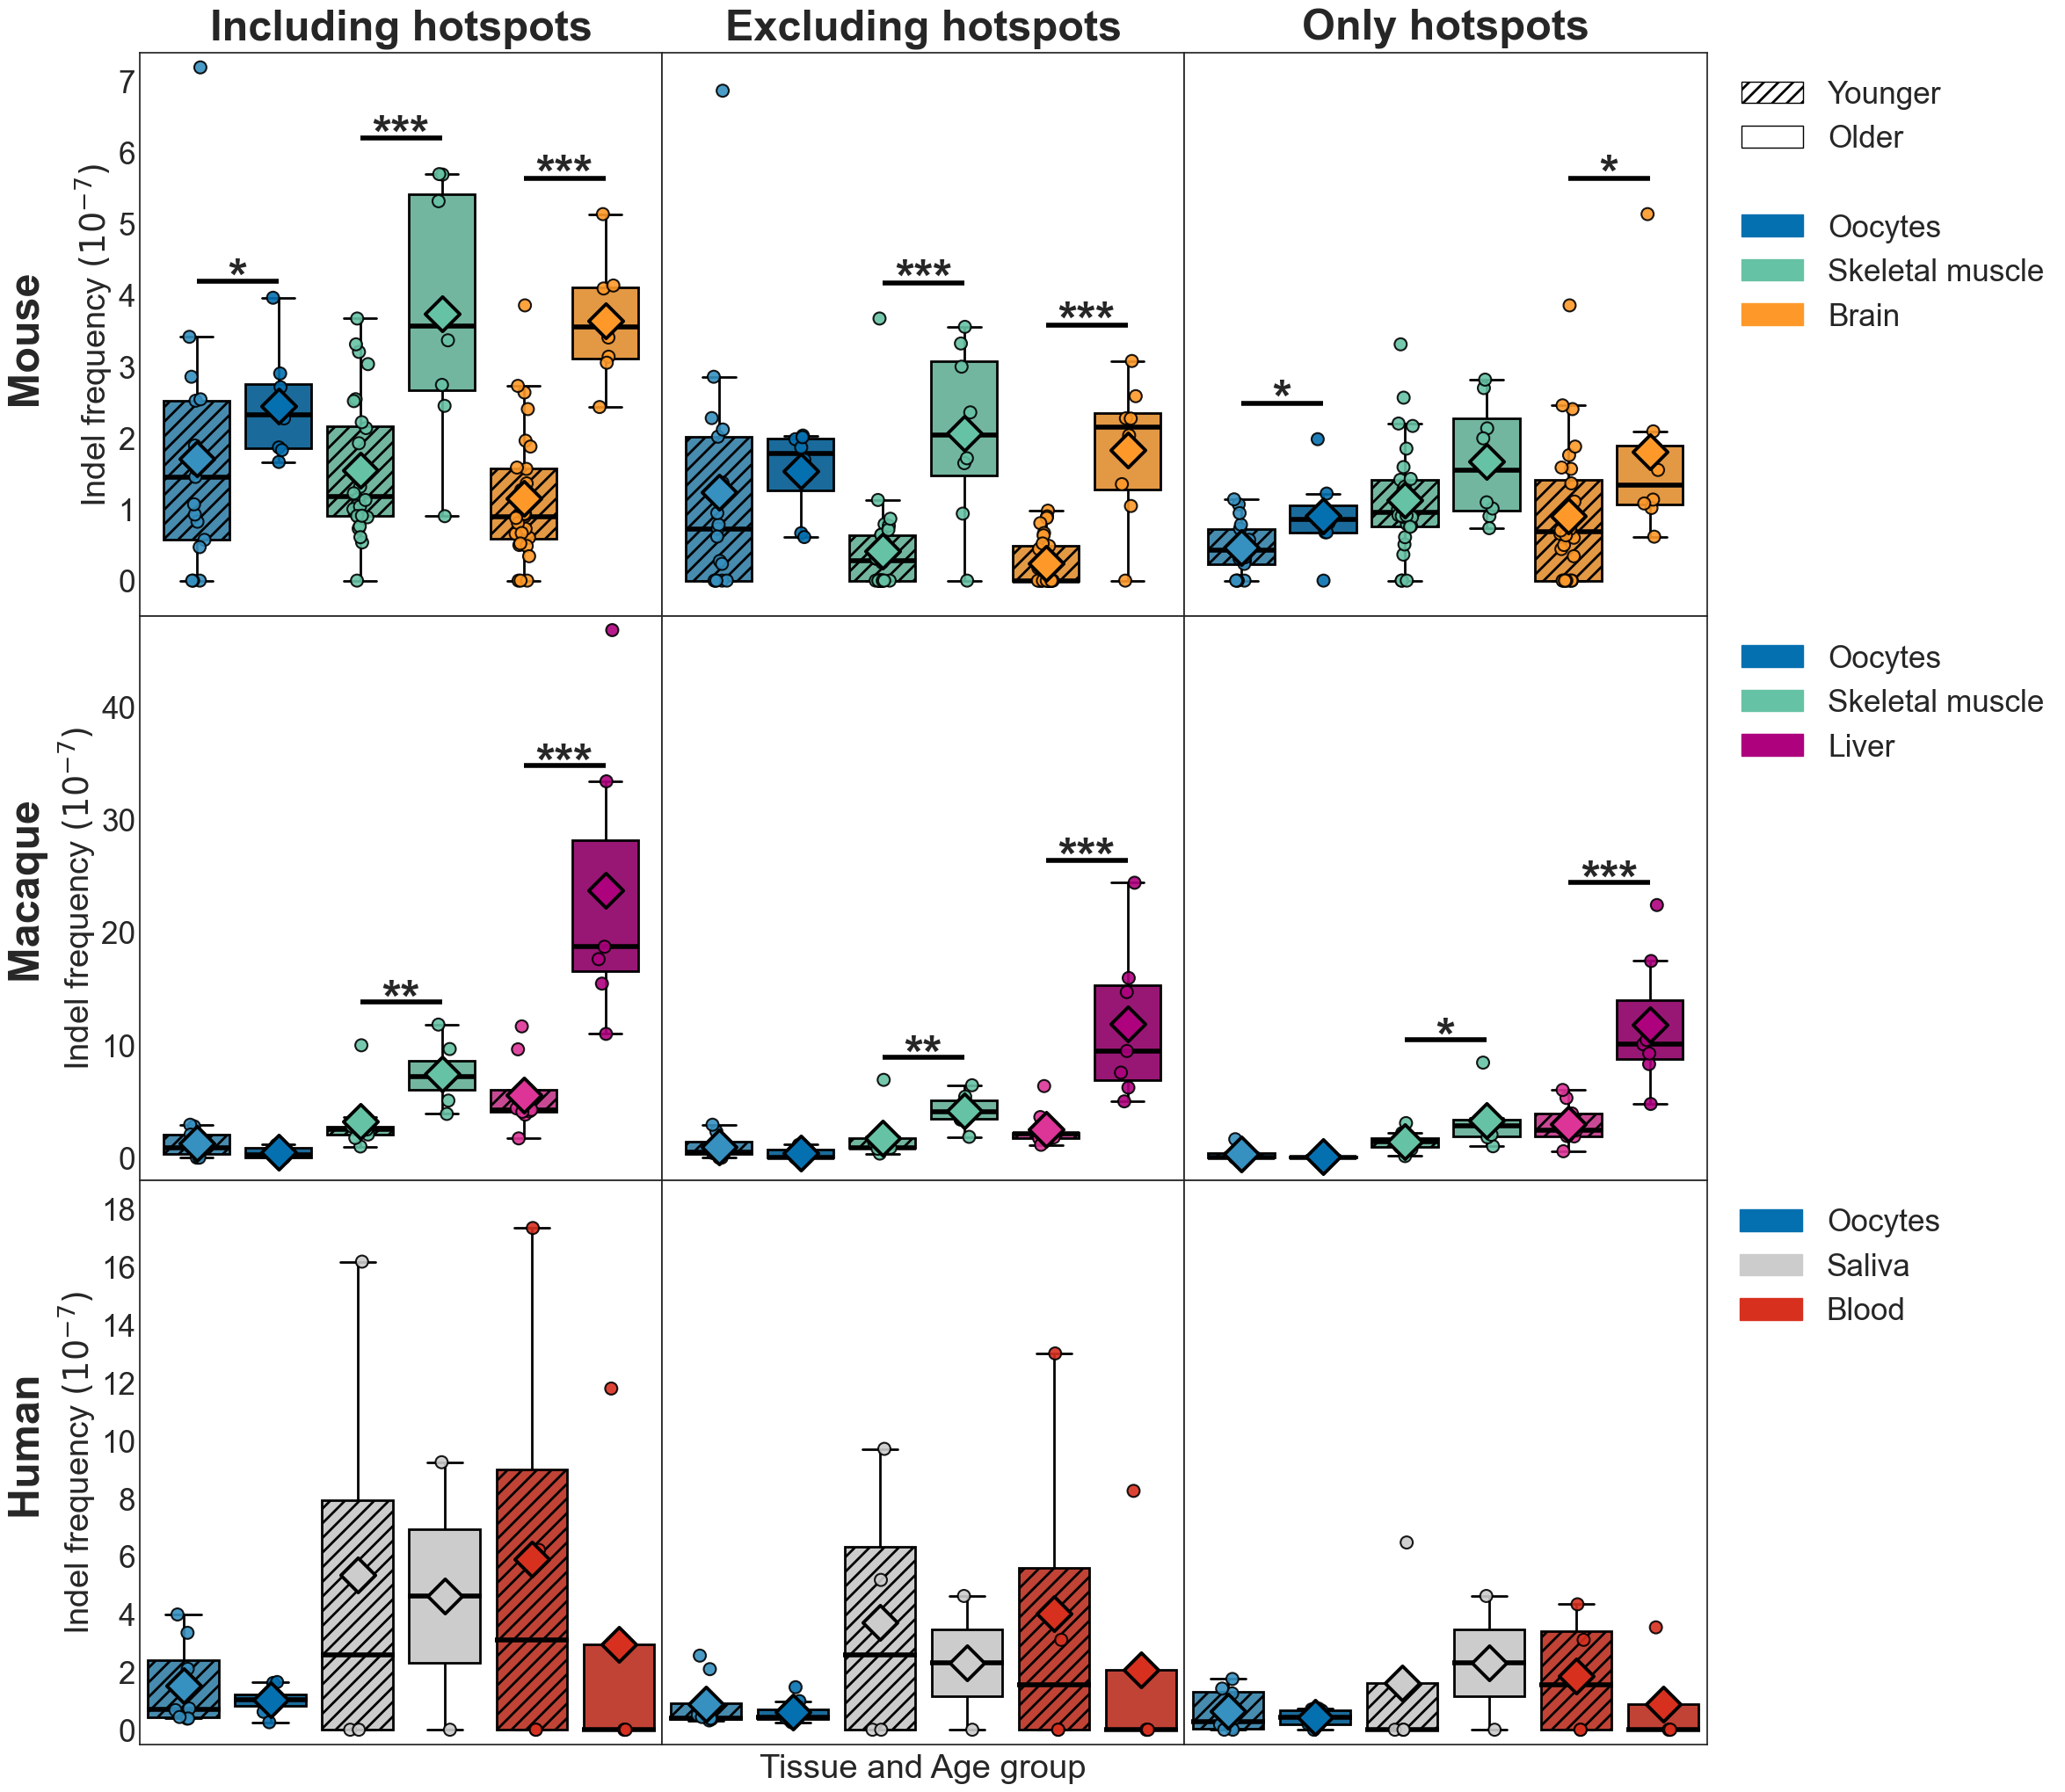

In [118]:
from matplotlib.ticker import MaxNLocator

#%%capture --no-stderr

# Suppress all warnings
warnings.filterwarnings("ignore")

def plot_by_individual():
    list_species = ['mouse','macaque','human']
    list_filterVersions = [ 'including', 'excluding', 'only' ]
    
    # Text size (font size) and plot style.
    sns.set(font_scale=2.3)
    plt.style.use('seaborn-v0_8-white')
    #plt.style.use('ggplot')
    
    # Setting the dimensions of the plot.
    fig, axes = plt.subplots(3,3,figsize=(23,25),sharey=False)

    # Adjust space between subplots.
    fig.subplots_adjust(hspace = 0, wspace=0)
    for y,filter_version in enumerate(list_filterVersions):
        # Get indels.
        df_indels = get_indels(filter_version)
        # Get individual-level freqs.
        df_freqs = get_indiv_freqs(df_indels)
        # Make label for plotting.
        df_freqs['Plot_label'] = df_freqs['Species'] +'_'+ df_freqs['Tissue'] +'_'+ df_freqs['Age_group']
        # Change power value of frequencies (Get rid of "1e10-7" in the plot).
        power_value = 7
        #power_value = abs(np.log10(max(df_freqs['Frequency'])).round())
        df_freqs['Frequency'] = df_freqs['Frequency'] * 10**power_value
        
        # Order each label.
        custom_order_mou = ['mouse_Oo_Younger','mouse_Oo_Older',
                            'mouse_M_Younger','mouse_M_Older',
                            'mouse_Br_Younger','mouse_Br_Older']
                            
        custom_order_mac = ['macaque_Oo_Younger','macaque_Oo_Older',
                            'macaque_M_Younger','macaque_M_Older',
                            'macaque_Li_Younger','macaque_Li_Older']
                            
        custom_order_hum = ['human_Oo_Younger','human_Oo_Older',
                            'human_Sa_Younger','human_Sa_Older',                      
                            'human_Bl_Younger','human_Bl_Older']
        
        # Custom palette.
        custom_palette_mou = ['#3690c0', '#0570b0',
                              '#66c2a4', '#66c2a4',
                              '#fe9929', '#fe9929']
    
        custom_palette_mac = ['#3690c0','#0570b0',
                              '#66c2a4','#66c2a4',
                              '#dd3497','#ae017e']
        
        custom_palette_hum = ['#3690c0', '#0570b0',
                              '#cccccc', '#cccccc',
                              '#d7301f', '#d7301f']
    
        # Use log scale.
        ##plt.yscale('log')

        # Filter by species.
        def get_species(df,species):
            return df[df['Species']==species].reset_index(drop=True)
    
        # BOX PLOT.
        sns.boxplot( ax = axes[0,y], data = get_species(df_freqs,"mouse"), x = 'Plot_label', y = 'Frequency',
                    order = custom_order_mou, palette = custom_palette_mou, width=0.9, linewidth=2, fliersize=0, gap = 0.1, linecolor='black' ) 
        sns.boxplot( ax = axes[1,y], data = get_species(df_freqs,"macaque"), x = 'Plot_label', y = 'Frequency',
                    order = custom_order_mac, palette = custom_palette_mac, width=0.9, linewidth=2, fliersize=0, gap = 0.1, linecolor='black' ) 
        sns.boxplot( ax = axes[2,y], data = get_species(df_freqs,"human"), x = 'Plot_label', y = 'Frequency',
                    order = custom_order_hum, palette = custom_palette_hum, width=0.9, linewidth=2, fliersize=0, gap = 0.1, linecolor='black' )
        
        # Add hatches (stripes) to boxplots.
        plt.rcParams['hatch.linewidth'] = 2.0
        for n in [0,1,2,3,4,5,6,7,8]:
            bars = fig.axes[n].patches
            hatches=['//',None,'//',None,'//',None]
            for pat,bar in zip(hatches,bars):
                bar.set_hatch(pat)

        # STRIP PLOT of median indel frequencies (reinforces boxplot lines).
        marker_size = 60
        df_medians = pd.DataFrame(get_species(df_freqs,'mouse').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[0,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size-5, marker="_",
                      order = custom_order_mou, color = 'black' )
        df_medians = pd.DataFrame(get_species(df_freqs,'macaque').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[1,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size-5, marker="_",
                      order = custom_order_mac, color = 'black' )
        df_medians = pd.DataFrame(get_species(df_freqs,'human').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
        sns.stripplot( ax = axes[2,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size, marker="_",
                      order = custom_order_hum, color = 'black' )

        # STRIP PLOT of individual frequencies.
        np.random.seed(123)
        dot_size = 10
        sns.stripplot( ax = axes[0,y], data = get_species(df_freqs,'mouse'), x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_mou, palette = custom_palette_mou, alpha=0.9 )
        sns.stripplot( ax = axes[1,y], data = get_species(df_freqs,'macaque'), x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_mac, palette = custom_palette_mac, alpha=0.9 )
        sns.stripplot( ax = axes[2,y], data = get_species(df_freqs,'human'), x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
                      order = custom_order_hum, palette = custom_palette_hum, alpha=0.9 )

        # STRIP PLOT of mean indel frequencies from individuals.
        diamond_size = 20
        marker = "D"
        df_means = pd.DataFrame(get_species(df_freqs,'mouse').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[0,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker=marker,
                      order = custom_order_mou, palette = custom_palette_mou )
        df_means = pd.DataFrame(get_species(df_freqs,'macaque').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[1,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker=marker,
                      order = custom_order_mac, palette = custom_palette_mac )
        df_means = pd.DataFrame(get_species(df_freqs,'human').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
        sns.stripplot( ax = axes[2,y], data = df_means, x = 'Plot_label', y = 'Frequency',
                      dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker=marker,
                      order = custom_order_hum, palette = custom_palette_hum )
        
        
        ### Add SIGNIFICANCE markers. ###
        results_test = perform_statistical_test(df_freqs)
        # fet_table = pd.read_table(f'tables/freqs.fisher_test_{filter_version}Hotspots.txt')
        # fet_table = fishers_test_on_freqs( df_indels )
        # Filter by tissue.
        def get_tissue(df,tissue):
            return df[df['Tissue']==tissue].reset_index(drop=True)
        # Filter by age group.
        def get_age_group(df,age_group):
            return df[df['Age_group']==age_group].reset_index(drop=True)
        for i,species in enumerate(['mouse','macaque','human']):
            list_tissue = {'mouse':['Oo','M','Br'],
                'macaque':['Oo','M','Li'],
                'human':['Oo','Sa','Bl']}[species]
            dict_tissue = {'Oo':'Oocytes','M':'Skeletal muscle','Br':'Brain',
                'Li':'Liver','Sa':'Saliva','Bl':'Blood'}
            for j,tissue in enumerate(list_tissue):
                filtered_data = get_tissue(get_species(df_freqs,species),tissue)
                #df_freqs[(df_freqs['Species'] == species) & (df_freqs['Tissue'] == tissue)]
                # Perform t-test between Younger and Older age groups
                young_values = filtered_data[filtered_data['Age_group'] == 'Younger']['Frequency']
                old_values = filtered_data[filtered_data['Age_group'] == 'Older']['Frequency']
                p_value = float(get_age_group(get_tissue(get_species(results_test,species),tissue),'Older')['P_value'])
                # Assign stars by significance level
                if p_value < 0.001:
                    stars = "***"
                elif p_value < 0.01:
                    stars = "**"
                elif p_value < 0.05:
                    stars = "*"
                else:
                    continue  # Not significant (if p-value >= 0.05)

                line_y_int = 1
                # # Lines.
                # axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')
                if species == 'mouse' and tissue == 'Oo'and filter_version in ['including','excluding']:
                    line_y_int = -3
                    # Stars.
                    axes[i,y].text(0.5+j*2, max(max(young_values), max(old_values)) + line_y_int-0.3, stars, fontweight='bold', 
                    horizontalalignment='center', verticalalignment='bottom', fontsize=40)
                    # Lines.
                    axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')
                elif species == 'macaque':
                    if tissue == 'Li' and filter_version == 'including':
                        line_y_int = -12
                        # Stars.
                        axes[i,y].text(0.5+j*2, max(max(young_values), max(old_values)) + line_y_int-2, stars, fontweight='bold', 
                        horizontalalignment='center', verticalalignment='bottom', fontsize=40)
                        # Lines.
                        axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')
                    else:
                        line_y_int = 2
                        # Stars.
                        axes[i,y].text(0.5+j*2, max(max(young_values), max(old_values)) + line_y_int-2, stars, fontweight='bold', 
                        horizontalalignment='center', verticalalignment='bottom', fontsize=40)
                        # Lines.
                        axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')
                    
                else:
                    line_y_int = 0.5
                    # Stars.
                    axes[i,y].text(0.5+j*2, max(max(young_values), max(old_values)) + line_y_int-0.3, stars, fontweight='bold', 
                    horizontalalignment='center', verticalalignment='bottom', fontsize=40)
                    # Lines.
                    axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')

        # Change titles.
        #title_size = 32
        #axes[0,y].set_title( "Mouse", fontsize=title_size, y = 0.9, rotation = 0)
        #axes[1,y].set_title( "Macaque", fontsize=title_size, y = 0.9, rotation = 0)
        #axes[2,y].set_title( "Human", fontsize=title_size, y = 0.9, rotation = 0)
    
        # Change axis labels.
        axes[0,y].set_xlabel('')
        axes[1,y].set_xlabel('')
        axes[2,y].set_xlabel('')
        axes[0,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
        axes[1,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
        axes[2,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)

        # Remove x tick labels.
        [ axes[y,x].set_xticklabels('') for x in [0,1,2] ]

    # Row-specific ylim values
    row_ylims = {
        0: (-0.5, 7.4),
        1: (-2, 48),
        2: (-0.5, 19)
    }
    for i, row in enumerate(range(3)):
        for j, col in enumerate(range(3)):
            ax = axes[i, j]
            ax.set_ylim(row_ylims[i]) # Change y-limits
            if j > 0:
                ax.set_ylabel("")  # Remove redundant y-axis labels for better clarity
                ax.set_yticklabels([])

    # percentage_raise = 1.02
    # [ axes[x,y].set_ylim([ axes[x,y].get_ylim()[0], axes[x,y].get_ylim()[1]*percentage_raise ]) for x in [0,1,2] ]

    # Force axes[2,0] tick labels to be integers.
    axes[2,0].yaxis.set_major_locator(MaxNLocator(integer=True))

    # Change legends.
    slashed_patch = mpatches.Patch( label='Younger',edgecolor='#000000', facecolor='#FFFFFF', hatch='//')
    white_patch = mpatches.Patch( label='Older',edgecolor='#000000', facecolor='#FFFFFF', hatch=None)
    blank_patch = mpatches.Patch(color='#FFFFFF', label='')

    first_patch = mpatches.Patch(color=custom_palette_mou[1], label='Oocytes')
    second_patch = mpatches.Patch(color=custom_palette_mou[3], label='Skeletal muscle')
    third_patch = mpatches.Patch(color=custom_palette_mou[5], label='Brain')
    axes[0,2].legend(
        handles=[slashed_patch,white_patch,blank_patch,first_patch,second_patch,third_patch], 
        bbox_to_anchor=(1.7, 1.0)
        )
    first_patch = mpatches.Patch(color=custom_palette_mac[1], label='Oocytes')
    second_patch = mpatches.Patch(color=custom_palette_mac[3], label='Skeletal muscle')
    third_patch = mpatches.Patch(color=custom_palette_mac[5], label='Liver')
    axes[1,2].legend(
        handles=[first_patch,second_patch,third_patch], 
        bbox_to_anchor=(1.7, 1.0)
        )
    first_patch = mpatches.Patch(color=custom_palette_hum[1], label='Oocytes')
    second_patch = mpatches.Patch(color=custom_palette_hum[3], label='Saliva')
    third_patch = mpatches.Patch(color=custom_palette_hum[5], label='Blood')
    axes[2,2].legend(
        handles=[first_patch,second_patch,third_patch], 
        bbox_to_anchor=(1.5, 1.0)
        )

    # Titles.
    title_size = 35
    #fig.suptitle( '           '.join(dict_DFs.keys()), 
    #              weight="bold", size=title_size, y=0.9
    #            )
    plt.suptitle( '                                 '.join(reversed([ x.capitalize() for x in list_species])), 
              weight="bold", size=title_size, y=0.78, x=0.07, rotation=90 
           )
    dict_filterVersions = {
        'including':'Including hotspots', 'excluding':'Excluding hotspots', 'only':'Only hotspots'
    }
    [ axes[0,n].set_title( dict_filterVersions[list_filterVersions[n]], fontsize=title_size, y = 1.01, rotation = 0, weight="bold") for n in [0,1,2] ]

    axes[2,1].set_xlabel( "Tissue and Age group", y = 1, rotation = 0)
    
    # Export as vectorized image.
    plt.savefig(f'plots/png/figure2_freqBoxplots_{alignment}.png', bbox_inches='tight', format='png', dpi=600)
    plt.savefig(f'plots/pdf/figure2_freqBoxplots_{alignment}.pdf', bbox_inches='tight', format='pdf', dpi=600)

    plt.show()


# # Allow all warnings
# warnings.filterwarnings("default")


plot_by_individual()

# Only oocytes

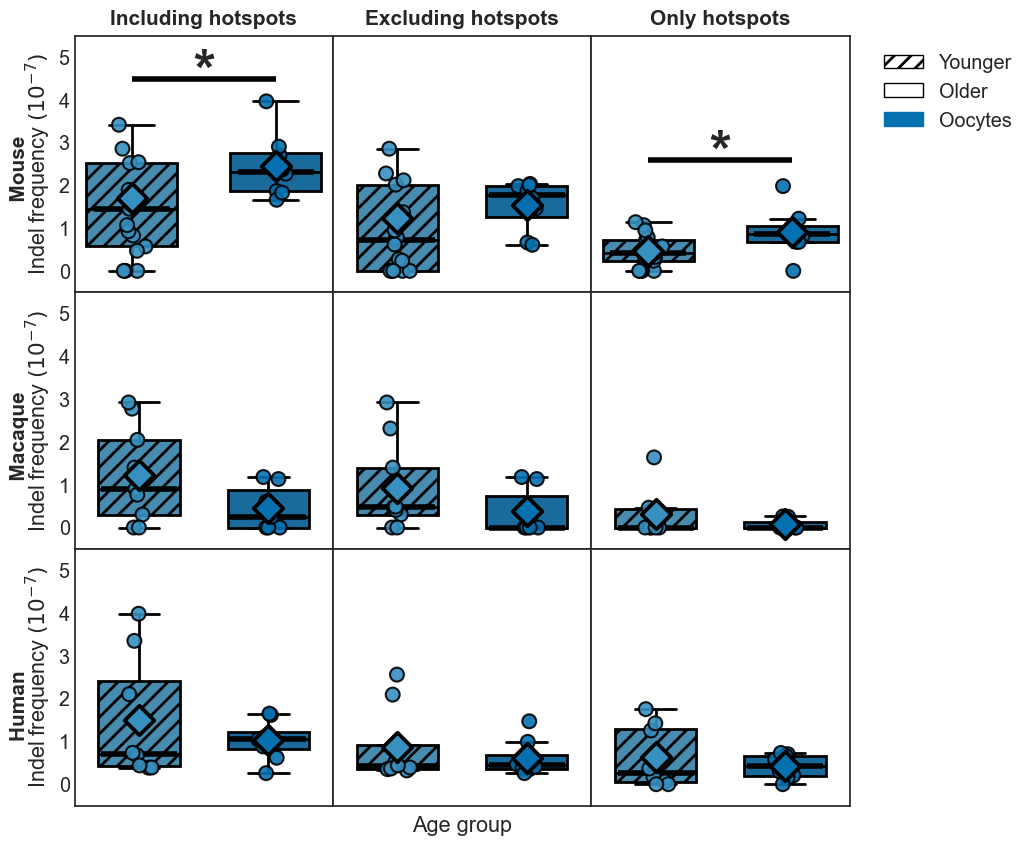

In [131]:
from matplotlib.ticker import MaxNLocator

#%%capture --no-stderr

# Suppress all warnings
warnings.filterwarnings("ignore")

def plot_by_individual():
	list_species = ['mouse','macaque','human']
	list_filterVersions = [ 'including', 'excluding', 'only' ]
	
	# Text size (font size) and plot style.
	sns.set(font_scale=1.3)
	plt.style.use('seaborn-v0_8-white')
	#plt.style.use('ggplot')
	
	# Setting the dimensions of the plot.
	fig, axes = plt.subplots(3,3,figsize=(10,10),sharey=False)

	# Adjust space between subplots.
	fig.subplots_adjust(hspace = 0, wspace=0)
	for y,filter_version in enumerate(list_filterVersions):
		# Get indels.
		df_indels = get_indels(filter_version)
		# Get individual-level freqs.
		df_freqs = get_indiv_freqs(df_indels)

		# Keep only oocytes
		df_freqs = df_freqs[df_freqs['Tissue'] == 'Oo'].reset_index(drop=True)

		# Make label for plotting.
		df_freqs['Plot_label'] = df_freqs['Species'] +'_'+ df_freqs['Tissue'] +'_'+ df_freqs['Age_group']
		# Change power value of frequencies (Get rid of "1e10-7" in the plot).
		power_value = 7
		#power_value = abs(np.log10(max(df_freqs['Frequency'])).round())
		df_freqs['Frequency'] = df_freqs['Frequency'] * 10**power_value
		
		# Order each label: only oocytes (Younger, Older)
		custom_order_mou = ['mouse_Oo_Younger','mouse_Oo_Older']
		custom_order_mac = ['macaque_Oo_Younger','macaque_Oo_Older']
		custom_order_hum = ['human_Oo_Younger','human_Oo_Older']
		
		# Custom palette: keep first two colors (Younger, Older)
		custom_palette_mou = ['#3690c0', '#0570b0']
		custom_palette_mac = ['#3690c0','#0570b0']
		custom_palette_hum = ['#3690c0', '#0570b0']
	
		# Filter by species.
		def get_species(df,species):
			return df[df['Species']==species].reset_index(drop=True)
	
		# BOX PLOT.
		sns.boxplot( ax = axes[0,y], data = get_species(df_freqs,"mouse"), x = 'Plot_label', y = 'Frequency',
					order = custom_order_mou, palette = custom_palette_mou, width=0.9, linewidth=2, fliersize=0, gap = 0.3, linecolor='black' ) 
		sns.boxplot( ax = axes[1,y], data = get_species(df_freqs,"macaque"), x = 'Plot_label', y = 'Frequency',
					order = custom_order_mac, palette = custom_palette_mac, width=0.9, linewidth=2, fliersize=0, gap = 0.3, linecolor='black' ) 
		sns.boxplot( ax = axes[2,y], data = get_species(df_freqs,"human"), x = 'Plot_label', y = 'Frequency',
					order = custom_order_hum, palette = custom_palette_hum, width=0.9, linewidth=2, fliersize=0, gap = 0.3, linecolor='black' )
		
		# Add hatches (stripes) to boxplots.
		plt.rcParams['hatch.linewidth'] = 2.0
		for n in [0,1,2,3,4,5,6,7,8]:
			bars = fig.axes[n].patches
			# two boxes per species -> two hatch patterns
			hatches=['//',None]
			for pat,bar in zip(hatches,bars):
				bar.set_hatch(pat)

		# STRIP PLOT of median indel frequencies (reinforces boxplot lines).
		marker_size = 60
		df_medians = pd.DataFrame(get_species(df_freqs,'mouse').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
		sns.stripplot( ax = axes[0,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size-5, marker="_",
					  order = custom_order_mou, color = 'black' )
		df_medians = pd.DataFrame(get_species(df_freqs,'macaque').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
		sns.stripplot( ax = axes[1,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size-5, marker="_",
					  order = custom_order_mac, color = 'black' )
		df_medians = pd.DataFrame(get_species(df_freqs,'human').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].median())
		sns.stripplot( ax = axes[2,y], data = df_medians, x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0, edgecolor='black', linewidth=4, alpha=1, s=marker_size-5, marker="_",
					  order = custom_order_hum, color = 'black' )

		# STRIP PLOT of individual frequencies.
		np.random.seed(123)
		dot_size = 10
		sns.stripplot( ax = axes[0,y], data = get_species(df_freqs,'mouse'), x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
					  order = custom_order_mou, palette = custom_palette_mou, alpha=0.9 )
		sns.stripplot( ax = axes[1,y], data = get_species(df_freqs,'macaque'), x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
					  order = custom_order_mac, palette = custom_palette_mac, alpha=0.9 )
		sns.stripplot( ax = axes[2,y], data = get_species(df_freqs,'human'), x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0.1, edgecolor='black', linewidth=1.5, s=dot_size,
					  order = custom_order_hum, palette = custom_palette_hum, alpha=0.9 )

		# STRIP PLOT of mean indel frequencies from individuals.
		diamond_size = 15
		marker = "D"
		df_means = pd.DataFrame(get_species(df_freqs,'mouse').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
		sns.stripplot( ax = axes[0,y], data = df_means, x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker=marker,
					  order = custom_order_mou, palette = custom_palette_mou )
		df_means = pd.DataFrame(get_species(df_freqs,'macaque').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
		sns.stripplot( ax = axes[1,y], data = df_means, x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker=marker,
					  order = custom_order_mac, palette = custom_palette_mac )
		df_means = pd.DataFrame(get_species(df_freqs,'human').groupby(by=['Species','Tissue','Age_group','Plot_label'])['Frequency'].mean())
		sns.stripplot( ax = axes[2,y], data = df_means, x = 'Plot_label', y = 'Frequency',
					  dodge=False, jitter=0, edgecolor='black', linewidth=2.75, alpha=1, s=diamond_size, marker=marker,
					  order = custom_order_hum, palette = custom_palette_hum )
		
				
		### Add SIGNIFICANCE markers. ###
		results_test = perform_statistical_test(df_freqs)
		# Filter by tissue.
		def get_tissue(df,tissue):
			return df[df['Tissue']==tissue].reset_index(drop=True)
		# Filter by age group.
		def get_age_group(df,age_group):
			return df[df['Age_group']==age_group].reset_index(drop=True)
		for i,species in enumerate(['mouse','macaque','human']):
			# only oocytes
			list_tissue = {'mouse':['Oo'],'macaque':['Oo'],'human':['Oo']}[species]
			dict_tissue = {'Oo':'Oocytes'}
			for j,tissue in enumerate(list_tissue):
				filtered_data = get_tissue(get_species(df_freqs,species),tissue)
				# Perform t-test between Younger and Older age groups
				young_values = filtered_data[filtered_data['Age_group'] == 'Younger']['Frequency']
				old_values = filtered_data[filtered_data['Age_group'] == 'Older']['Frequency']
				# safe guard if no test result available
				try:
					p_value = float(get_age_group(get_tissue(get_species(results_test,species),tissue),'Older')['P_value'])
				except Exception:
					continue
				# Assign stars by significance level
				if p_value < 0.001:
					stars = "***"
				elif p_value < 0.01:
					stars = "**"
				elif p_value < 0.05:
					stars = "*"
				else:
					continue  # Not significant (if p-value >= 0.05)

				line_y_int = 1
				if species == 'mouse' and tissue == 'Oo'and filter_version in ['including','excluding']:
					line_y_int = -2.7
					axes[i,y].text(0.5+j*2, max(max(young_values), max(old_values)) + line_y_int-0.5, stars, fontweight='bold', 
					horizontalalignment='center', verticalalignment='bottom', fontsize=40)
					axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')
				elif species == 'macaque':
					if tissue == 'Li' and filter_version == 'including':
						line_y_int = -12
						axes[i,y].text(0.5+j*2, max(max(young_values), max(old_values)) + line_y_int-2, stars, fontweight='bold', 
						horizontalalignment='center', verticalalignment='bottom', fontsize=40)
						axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')
					else:
						line_y_int = 2
						axes[i,y].text(0.5+j*2, max(max(young_values), max(old_values)) + line_y_int-2, stars, fontweight='bold', 
						horizontalalignment='center', verticalalignment='bottom', fontsize=40)
						axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')
					
				else:
					line_y_int = 0.6
					axes[i,y].text(0.5+j*2, max(max(young_values), max(old_values)) + line_y_int-0.5, stars, fontweight='bold', 
					horizontalalignment='center', verticalalignment='bottom', fontsize=40)
					axes[i,y].plot([j*2,j*2+1], [max(max(young_values), max(old_values)) + line_y_int, max(max(young_values), max(old_values)) + line_y_int], color='black', lw=4, solid_capstyle='butt')

		# Change axis labels.
		axes[0,y].set_xlabel('')
		axes[1,y].set_xlabel('')
		axes[2,y].set_xlabel('')
		axes[0,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
		axes[1,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)
		axes[2,y].set_ylabel(r'Indel frequency $(10^{-%i})$' %power_value)

		# Remove x tick labels for cleanliness
		[ axes[row,col].set_xticklabels('') for row in range(3) for col in [0,1,2] ]

	# Row-specific ylim values
	row_ylims = {
		0: (-0.5, 5.5),
		1: (-0.5, 5.5),
		2: (-0.5, 5.5)
	}
	for i, row in enumerate(range(3)):
		for j, col in enumerate(range(3)):
			ax = axes[i, j]
			ax.set_ylim(row_ylims[i]) # Change y-limits
			if j > 0:
				ax.set_ylabel("")  # Remove redundant y-axis labels for better clarity
				ax.set_yticklabels([])

	# Force axes[2,0] tick labels to be integers.
	axes[2,0].yaxis.set_major_locator(MaxNLocator(integer=True))

	# Change legends.
	slashed_patch = mpatches.Patch( label='Younger',edgecolor='#000000', facecolor='#FFFFFF', hatch='//')
	white_patch = mpatches.Patch( label='Older',edgecolor='#000000', facecolor='#FFFFFF', hatch=None)
	blank_patch = mpatches.Patch(color='#FFFFFF', label='')

	first_patch = mpatches.Patch(color=custom_palette_mou[1], label='Oocytes')
	axes[0,2].legend(
		handles=[slashed_patch,white_patch,first_patch], 
		bbox_to_anchor=(1.7, 1.0)
		)
	
	# Titles.
	title_size = 15
	plt.suptitle( '                                 '.join(reversed([ x.capitalize() for x in list_species])), 
			  weight="bold", size=title_size, y=0.78, x=0.07, rotation=90 
		   )
	dict_filterVersions = {
		'including':'Including hotspots', 'excluding':'Excluding hotspots', 'only':'Only hotspots'
	}
	[ axes[0,n].set_title( dict_filterVersions[list_filterVersions[n]], fontsize=title_size, y = 1.01, rotation = 0, weight="bold") for n in [0,1,2] ]

	axes[2,1].set_xlabel( "Age group", y = 1, rotation = 0)
	
	# Export as vectorized image.
	plt.savefig(f'plots/png/figureSX_freqBoxplots_Oo_{alignment}.png', bbox_inches='tight', format='png', dpi=600)
	plt.savefig(f'plots/pdf/figureSX_freqBoxplots_Oo_{alignment}.pdf', bbox_inches='tight', format='pdf', dpi=600)

	plt.show()


plot_by_individual()